In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

# Set display option to show all columns
pd.set_option('display.max_columns', None)
# imports data frame
df = pd.read_csv("archive/vahid_final.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head(10)

,ATP,B365_PlayerA,B365_PlayerB,PS_PlayerA,PS_PlayerB,PlayerA_Pts,PlayerB_Pts,match_count_PlayerA,match_count_PlayerB,elo_PlayerA,elo_PlayerB,proba_elo_PlayerA_Wins,match_count_indoor_hard_winner,match_count_indoor_hard_loser,elo_indoor_hard_winner,elo_indoor_hard_loser,proba_elo_indoor_hard,match_count_indoor_carpet_winner,match_count_indoor_carpet_loser,elo_indoor_carpet_winner,elo_indoor_carpet_loser,proba_elo_indoor_carpet,match_count_indoor_clay_winner,match_count_indoor_clay_loser,elo_indoor_clay_winner,elo_indoor_clay_loser,proba_elo_indoor_clay,match_count_outdoor_hard_winner,match_count_outdoor_hard_loser,elo_outdoor_hard_winner,elo_outdoor_hard_loser,proba_elo_outdoor_hard,match_count_outdoor_clay_winner,match_count_outdoor_clay_loser,elo_outdoor_clay_winner,elo_outdoor_clay_loser,proba_elo_outdoor_clay,match_count_outdoor_grass_winner,match_count_outdoor_grass_loser,elo_outdoor_grass_winner,elo_outdoor_grass_loser,proba_elo_outdoor_grass,PlayerA_ID,PlayerB_ID,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Tournament_ID,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Round_1st Round,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final,Best_of_3.0,Best_of_5.0,Year,Month,Day,DayOfWeek,PlayerA_Wins,proba_elo_PlayerB_Wins
0,1,1.160,4.500,1.241,4.550,0.0,0.0,0,0,1500.000000,1500.000000,0.500000,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.000000,1500.000000,0.500000,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,1,465,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2004,1,5,0,True,0.500000
1,1,1.720,2.000,1.752,2.170,0.0,0.0,0,13,1500.000000,1569.125950,0.401812,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,13,0,1569.125950,1500.000000,0.598188,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,33,2,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2004,1,5,0,False,0.598188
2,1,1.830,1.830,2.210,1.730,0.0,0.0,3,1,1515.297526,1484.000000,0.544919,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,1,3,1484.000000,1515.297526,0.455081,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,510,3,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2004,1,5,0,False,0.455081
3,1,1.400,2.750,1.459,2.930,0.0,0.0,0,0,1500.000000,1500.000000,0.500000,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.000000,1500.000000,0.500000,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,4,303,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2004,1,5,0,True,0.500000
4,1,1.909,1.800,2.000,1.862,0.0,0.0,0,3,1500.000000,1457.584184,0.560740,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,3,0,1457.584184,1500.000000,0.439260,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,36,5,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2004,1,5,0,False,0.439260
5,1,1.900,1.800,2.250,1.699,0.0,0.0,0,0,1500.000000,1500.000000,0.500000,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.000000,1500.000000,0.500000,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,673,6,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2004,1,6,1,False,0.500000
6,1,2.375,1.533,2.510,1.592,0.0,0.0,0,1,1500.000000,1484.000000,0.523010,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,0,0,1500.0,1500.0,0.5,1,0,1484.000000,1500.000000,0.476990,0,0,1500.0,1500.0,0.5

In [156]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48824 entries, 0 to 48823
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ATP                               48824 non-null  int64  
 1   B365_PlayerA                      48824 non-null  float64
 2   B365_PlayerB                      48824 non-null  float64
 3   PS_PlayerA                        48824 non-null  float64
 4   PS_PlayerB                        48824 non-null  float64
 5   PlayerA_Pts                       48824 non-null  float64
 6   PlayerB_Pts                       48824 non-null  float64
 7   match_count_PlayerA               48824 non-null  int64  
 8   match_count_PlayerB               48824 non-null  int64  
 9   elo_PlayerA                       48824 non-null  float64
 10  elo_PlayerB                       48824 non-null  float64
 11  proba_elo_PlayerA_Wins            48824 non-null  float64
 12  matc

In [3]:
# this is important to sort the dataframe to check if the match counts works
# Combine 'Year', 'Month', and 'Day' columns into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sort the DataFrame by the 'Date' column
df = df.sort_values(by='Date')

# Now df_ contains the DataFrame sorted by date

In [3]:
df.isnull().sum()

ATP                       0
B365_PlayerA              0
B365_PlayerB              0
PS_PlayerA                0
PS_PlayerB                0
                         ..
Month                     0
Day                       0
DayOfWeek                 0
PlayerA_Wins              0
proba_elo_PlayerB_Wins    0
Length: 75, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48824 entries, 0 to 5341
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   ATP                               48824 non-null  int64         
 1   B365_PlayerA                      48824 non-null  float64       
 2   B365_PlayerB                      48824 non-null  float64       
 3   PS_PlayerA                        48824 non-null  float64       
 4   PS_PlayerB                        48824 non-null  float64       
 5   PlayerA_Pts                       48824 non-null  float64       
 6   PlayerB_Pts                       48824 non-null  float64       
 7   match_count_PlayerA               48824 non-null  int64         
 8   match_count_PlayerB               48824 non-null  int64         
 9   elo_PlayerA                       48824 non-null  float64       
 10  elo_PlayerB                       48824 non-null  fl


# Data engineering part for the modeling data frame
# Goal is to engineering values to improve accuracy of the model



In [4]:
# Match count for each player
# Initialize match counts for each player
match_count_playerA = {}
match_count_playerB = {}

# Iterate through each row in the sorted DataFrame
for index, row in df.iterrows():
    # Get player IDs for the current match
    playerA_id = row['PlayerA_ID']
    playerB_id = row['PlayerB_ID']
    
    # Initialize match count for new players
    if playerA_id not in match_count_playerA:
        match_count_playerA[playerA_id] = 1
    if playerB_id not in match_count_playerB:
        match_count_playerB[playerB_id] = 1
    
    # Update match counts for the current match
    df.at[index, 'match_count_PlayerA'] = match_count_playerA[playerA_id]
    df.at[index, 'match_count_PlayerB'] = match_count_playerB[playerB_id]
    
    # Increment match counts for the players
    match_count_playerA[playerA_id] += 1
    match_count_playerB[playerB_id] += 1
    

In [11]:
# Checks if the match count is intialized
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48824 entries, 0 to 5341
Columns: 236 entries, ATP to Wins_Per_Match_Ratio_PlayerB_ATP
dtypes: bool(25), datetime64[ns](1), float64(180), int64(30)
memory usage: 81.1 MB


# Calulate surface specific values

In [5]:
# Create empty dictionaries to store cumulative win counts for each player for all surfaces
wins_A_dict = {}
wins_B_dict = {}

# Create empty dictionaries to store cumulative win counts for each player for each surface
wins_A_carpet_dict = {}
wins_B_carpet_dict = {}
wins_A_clay_dict = {}
wins_B_clay_dict = {}
wins_A_grass_dict = {}
wins_B_grass_dict = {}
wins_A_hard_dict = {}
wins_B_hard_dict = {}

# Initialize cumulative win counts for each player to 0
for player_id in set(df['PlayerA_ID']).union(set(df['PlayerB_ID'])):
    wins_A_dict[player_id] = 0
    wins_B_dict[player_id] = 0
    wins_A_carpet_dict[player_id] = 0
    wins_B_carpet_dict[player_id] = 0
    wins_A_clay_dict[player_id] = 0
    wins_B_clay_dict[player_id] = 0
    wins_A_grass_dict[player_id] = 0
    wins_B_grass_dict[player_id] = 0
    wins_A_hard_dict[player_id] = 0
    wins_B_hard_dict[player_id] = 0

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Update cumulative win counts based on PlayerA_Wins
    player_A_id = row['PlayerA_ID']
    player_B_id = row['PlayerB_ID']
    
    # Update cumulative win counts for all surfaces
    cumulative_wins_A = wins_A_dict[player_A_id]
    cumulative_wins_B = wins_B_dict[player_B_id]
    
    cumulative_wins_A += row['PlayerA_Wins']
    cumulative_wins_B += (1 - row['PlayerA_Wins'])  # Player B wins if Player A doesn't
    
    # Update cumulative win counts for each surface
    if row['Surface_Carpet']:
        wins_A_carpet_dict[player_A_id] += row['PlayerA_Wins']
        wins_B_carpet_dict[player_B_id] += (1 - row['PlayerA_Wins'])
    elif row['Surface_Clay']:
        wins_A_clay_dict[player_A_id] += row['PlayerA_Wins']
        wins_B_clay_dict[player_B_id] += (1 - row['PlayerA_Wins'])
    elif row['Surface_Grass']:
        wins_A_grass_dict[player_A_id] += row['PlayerA_Wins']
        wins_B_grass_dict[player_B_id] += (1 - row['PlayerA_Wins'])
    elif row['Surface_Hard']:
        wins_A_hard_dict[player_A_id] += row['PlayerA_Wins']
        wins_B_hard_dict[player_B_id] += (1 - row['PlayerA_Wins'])
    
    # Store cumulative win counts for each player for all surfaces
    wins_A_dict[player_A_id] = cumulative_wins_A
    wins_B_dict[player_B_id] = cumulative_wins_B

    # Add the cumulative win counts as new columns in the sorted dataframe
    df.at[index, 'Wins_Player_A'] = cumulative_wins_A
    df.at[index, 'Wins_Player_B'] = cumulative_wins_B
    
    # Add the cumulative win counts for each surface as new columns in the sorted dataframe
    df.at[index, 'Wins_Player_A_Carpet'] = wins_A_carpet_dict[player_A_id]
    df.at[index, 'Wins_Player_B_Carpet'] = wins_B_carpet_dict[player_B_id]
    df.at[index, 'Wins_Player_A_Clay'] = wins_A_clay_dict[player_A_id]
    df.at[index, 'Wins_Player_B_Clay'] = wins_B_clay_dict[player_B_id]
    df.at[index, 'Wins_Player_A_Grass'] = wins_A_grass_dict[player_A_id]
    df.at[index, 'Wins_Player_B_Grass'] = wins_B_grass_dict[player_B_id]
    df.at[index, 'Wins_Player_A_Hard'] = wins_A_hard_dict[player_A_id]
    df.at[index, 'Wins_Player_B_Hard'] = wins_B_hard_dict[player_B_id]


In [6]:
# Add columns for wins per match for PlayerA and PlayerB
df['Wins_Per_Match_ratio_PlayerA'] = (df['Wins_Player_A'] / df['match_count_PlayerA']).fillna(0)
df['Wins_Per_Match_ratio_PlayerB'] = (df['Wins_Player_B'] / df['match_count_PlayerB']).fillna(0)





In [7]:
# Calculate match counts for Player A on Carpet surface
df['match_count_PlayerA_Carpet'] = df.groupby(['PlayerA_ID', 'Surface_Carpet']).cumcount() + 1

# Calculate match counts for Player A on Clay surface
df['match_count_PlayerA_Clay'] = df.groupby(['PlayerA_ID', 'Surface_Clay']).cumcount() + 1

# Calculate match counts for Player A on Grass surface
df['match_count_PlayerA_Grass'] = df.groupby(['PlayerA_ID', 'Surface_Grass']).cumcount() + 1

# Calculate match counts for Player A on Hard surface
df['match_count_PlayerA_Hard'] = df.groupby(['PlayerA_ID', 'Surface_Hard']).cumcount() + 1

# Calculate match counts for Player B on Carpet surface
df['match_count_PlayerB_Carpet'] = df.groupby(['PlayerB_ID', 'Surface_Carpet']).cumcount() + 1

# Calculate match counts for Player B on Clay surface
df['match_count_PlayerB_Clay'] = df.groupby(['PlayerB_ID', 'Surface_Clay']).cumcount() + 1

# Calculate match counts for Player B on Grass surface
df['match_count_PlayerB_Grass'] = df.groupby(['PlayerB_ID', 'Surface_Grass']).cumcount() + 1

# Calculate match counts for Player B on Hard surface
df['match_count_PlayerB_Hard'] = df.groupby(['PlayerB_ID', 'Surface_Hard']).cumcount() + 1


# Calculate the ratio of wins on each surface for Player A
df['Wins_Per_Match_Ratio_PlayerA_Carpet'] = df['Wins_Player_A_Carpet'] / df['match_count_PlayerA_Carpet'].where(df['match_count_PlayerA_Carpet'] != 0, 1)
df['Wins_Per_Match_Ratio_PlayerA_Clay'] = df['Wins_Player_A_Clay'] / df['match_count_PlayerA_Clay'].where(df['match_count_PlayerA_Clay'] != 0, 1)
df['Wins_Per_Match_Ratio_PlayerA_Grass'] = df['Wins_Player_A_Grass'] / df['match_count_PlayerA_Grass'].where(df['match_count_PlayerA_Grass'] != 0, 1)
df['Wins_Per_Match_Ratio_PlayerA_Hard'] = df['Wins_Player_A_Hard'] / df['match_count_PlayerA_Hard'].where(df['match_count_PlayerA_Hard'] != 0, 1)

# Calculate the ratio of wins on each surface for Player B
df['Wins_Per_Match_Ratio_PlayerB_Carpet'] = df['Wins_Player_B_Carpet'] / df['match_count_PlayerB_Carpet'].where(df['match_count_PlayerB_Carpet'] != 0, 1)
df['Wins_Per_Match_Ratio_PlayerB_Clay'] = df['Wins_Player_B_Clay'] / df['match_count_PlayerB_Clay'].where(df['match_count_PlayerB_Clay'] != 0, 1)
df['Wins_Per_Match_Ratio_PlayerB_Grass'] = df['Wins_Player_B_Grass'] / df['match_count_PlayerB_Grass'].where(df['match_count_PlayerB_Grass'] != 0, 1)
df['Wins_Per_Match_Ratio_PlayerB_Hard'] = df['Wins_Player_B_Hard'] / df['match_count_PlayerB_Hard'].where(df['match_count_PlayerB_Hard'] != 0, 1)


# calculate tournamnent specific variables

In [8]:
# Create empty dictionaries to store cumulative win counts for each player for each variable
cumulative_wins_dicts = {
    "Series_ATP250": {},
    "Series_ATP500": {},
    "Series_Grand Slam": {},
    "Series_International": {},
    "Series_International Gold": {},
    "Series_Masters": {},
    "Series_Masters 1000": {},
    "Series_Masters Cup": {},
    "Court_Indoor": {},
    "Court_Outdoor": {},
    "Round_1st Round": {},
    "Round_2nd Round": {},
    "Round_3rd Round": {},
    "Round_4th Round": {},
    "Round_Quarterfinals": {},
    "Round_Round Robin": {},
    "Round_Semifinals": {},
    "Round_The Final": {},
    "Best_of_3.0": {},
    "Best_of_5.0": {},
    "Tournament_ID":{},
    "ATP": {}
}

# Initialize cumulative win counts for each player to 0 for each variable
for variable, win_dict in cumulative_wins_dicts.items():
    for player_id in set(df['PlayerA_ID']).union(set(df['PlayerB_ID'])):
        win_dict[player_id] = 0

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Update cumulative win counts based on PlayerA_Wins
    player_A_id = row['PlayerA_ID']
    player_B_id = row['PlayerB_ID']
    
    # Update cumulative win counts for each variable
    for variable, win_dict in cumulative_wins_dicts.items():
        if row[variable]:
            if row['PlayerA_Wins'] == 1:
                win_dict[player_A_id] += 1
            else:
                win_dict[player_B_id] += 1
    
    # Add the cumulative win counts as new columns in the dataframe
    for variable, win_dict in cumulative_wins_dicts.items():
        df.at[index, f'Wins_Player_A_{variable}'] = win_dict[player_A_id]
        df.at[index, f'Wins_Player_B_{variable}'] = win_dict[player_B_id]

# Now calculate the match count for each variable and each player
for variable in cumulative_wins_dicts.keys():
    match_dict = {}
    for player_id in set(df['PlayerA_ID']).union(set(df['PlayerB_ID'])):
        match_dict[player_id] = 0
    
    for index, row in df.iterrows():
        player_A_id = row['PlayerA_ID']
        player_B_id = row['PlayerB_ID']
        
        if row[variable]:
            match_dict[player_A_id] += 1
            match_dict[player_B_id] += 1
    
    for index, row in df.iterrows():
        player_A_id = row['PlayerA_ID']
        player_B_id = row['PlayerB_ID']
        
        df.at[index, f'match_count_PlayerA_{variable}'] = match_dict[player_A_id]
        df.at[index, f'match_count_PlayerB_{variable}'] = match_dict[player_B_id]

# Calculate the ratio of wins per match for each player and each variable
for variable in cumulative_wins_dicts.keys():
    for player in ['A', 'B']:
        df[f'Wins_Per_Match_Ratio_Player{player}_{variable}'] = df[f'Wins_Player_{player}_{variable}'] / df[f'match_count_Player{player}_{variable}'].where(df[f'match_count_Player{player}_{variable}'] != 0, 1)

# Now df contains the ratio of wins per match for each player and each variable



C:\Users\Patrick\AppData\Local\Temp\ipykernel_21864\3285474423.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, f'match_count_PlayerA_{variable}'] = match_dict[player_A_id]
C:\Users\Patrick\AppData\Local\Temp\ipykernel_21864\3285474423.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, f'match_count_PlayerB_{variable}'] = match_dict[player_B_id]
C:\Users\Patrick\AppData\Local\Temp\ipykernel_21864\3285474423.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

In [111]:
# Back up
# Export DataFrame to a CSV file
df.to_csv('bigframe2.csv', index=False)  # Specify index=False if you don't want to include row numbers


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48824 entries, 0 to 5341
Columns: 236 entries, ATP to Wins_Per_Match_Ratio_PlayerB_ATP
dtypes: bool(25), datetime64[ns](1), float64(180), int64(30)
memory usage: 81.1 MB


In [ ]:
# This column is there in case some varibales must be scaled
'''
from sklearn.preprocessing import StandardScaler

# Selecting columns to scale
columns_to_scale = [col for col in df.columns if df[col].dtype != bool 
                    and col not in ['PlayerA_ID', 'PlayerB_ID','B365_PlayerA', 'B365_PlayerB', 'PS_PlayerA', 'PS_PlayerB']]

# Scale the selected columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
'''


In [17]:
# This list can be used to delet variables from the enginnered data frame [Certain variables have been already deleted]
columns_list = ['ATP',
 'B365_PlayerA',
 'B365_PlayerB',
 'PS_PlayerA',
 'PS_PlayerB',
 'PlayerA_Pts',
 'PlayerB_Pts',
 'match_count_PlayerA',
 'match_count_PlayerB',
 'elo_PlayerA',
 'elo_PlayerB',
 'proba_elo_PlayerA_Wins',
 'PlayerA_ID',
 'PlayerB_ID',
 'Surface_Carpet',
 'Surface_Clay',
 'Surface_Grass',
 'Surface_Hard',
 'Tournament_ID',
 'Series_ATP250',
 'Series_ATP500',
 'Series_Grand Slam',
 'Series_International',
 'Series_International Gold',
 'Series_Masters',
 'Series_Masters 1000',
 'Series_Masters Cup',
 'Court_Indoor',
 'Court_Outdoor',
 'Round_1st Round',
 'Round_2nd Round',
 'Round_3rd Round',
 'Round_4th Round',
 'Round_Quarterfinals',
 'Round_Round Robin',
 'Round_Semifinals',
 'Round_The Final',
 'Best_of_3.0',
 'Best_of_5.0',
 'Year',
 'Month',
 'Day',
 'DayOfWeek',
 'PlayerA_Wins',
 'proba_elo_PlayerB_Wins',
 'Wins_Player_A',
 'Wins_Player_B',
 'Wins_Player_A_Carpet',
 'Wins_Player_B_Carpet',
 'Wins_Player_A_Clay',
 'Wins_Player_B_Clay',
 'Wins_Player_A_Grass',
 'Wins_Player_B_Grass',
 'Wins_Player_A_Hard',
 'Wins_Player_B_Hard',
 'Wins_Per_Match_ratio_PlayerA',
 'Wins_Per_Match_ratio_PlayerB',
 'match_count_PlayerA_Carpet',
 'match_count_PlayerA_Clay',
 'match_count_PlayerA_Grass',
 'match_count_PlayerA_Hard',
 'match_count_PlayerB_Carpet',
 'match_count_PlayerB_Clay',
 'match_count_PlayerB_Grass',
 'match_count_PlayerB_Hard',
 'Wins_Per_Match_Ratio_PlayerA_Carpet',
 'Wins_Per_Match_Ratio_PlayerA_Clay',
 'Wins_Per_Match_Ratio_PlayerA_Grass',
 'Wins_Per_Match_Ratio_PlayerA_Hard',
 'Wins_Per_Match_Ratio_PlayerB_Carpet',
 'Wins_Per_Match_Ratio_PlayerB_Clay',
 'Wins_Per_Match_Ratio_PlayerB_Grass',
 'Wins_Per_Match_Ratio_PlayerB_Hard',
 'Wins_Player_A_Series_ATP250',
 'Wins_Player_B_Series_ATP250',
 'Wins_Player_A_Series_ATP500',
 'Wins_Player_B_Series_ATP500',
 'Wins_Player_A_Series_Grand Slam',
 'Wins_Player_B_Series_Grand Slam',
 'Wins_Player_A_Series_International',
 'Wins_Player_B_Series_International',
 'Wins_Player_A_Series_International Gold',
 'Wins_Player_B_Series_International Gold',
 'Wins_Player_A_Series_Masters',
 'Wins_Player_B_Series_Masters',
 'Wins_Player_A_Series_Masters 1000',
 'Wins_Player_B_Series_Masters 1000',
 'Wins_Player_A_Series_Masters Cup',
 'Wins_Player_B_Series_Masters Cup',
 'Wins_Player_A_Court_Indoor',
 'Wins_Player_B_Court_Indoor',
 'Wins_Player_A_Court_Outdoor',
 'Wins_Player_B_Court_Outdoor',
 'Wins_Player_A_Round_1st Round',
 'Wins_Player_B_Round_1st Round',
 'Wins_Player_A_Round_2nd Round',
 'Wins_Player_B_Round_2nd Round',
 'Wins_Player_A_Round_3rd Round',
 'Wins_Player_B_Round_3rd Round',
 'Wins_Player_A_Round_4th Round',
 'Wins_Player_B_Round_4th Round',
 'Wins_Player_A_Round_Quarterfinals',
 'Wins_Player_B_Round_Quarterfinals',
 'Wins_Player_A_Round_Round Robin',
 'Wins_Player_B_Round_Round Robin',
 'Wins_Player_A_Round_Semifinals',
 'Wins_Player_B_Round_Semifinals',
 'Wins_Player_A_Round_The Final',
 'Wins_Player_B_Round_The Final',
 'Wins_Player_A_Best_of_3.0',
 'Wins_Player_B_Best_of_3.0',
 'Wins_Player_A_Best_of_5.0',
 'Wins_Player_B_Best_of_5.0',
 'match_count_PlayerA_Series_ATP250',
 'match_count_PlayerB_Series_ATP250',
 'match_count_PlayerA_Series_ATP500',
 'match_count_PlayerB_Series_ATP500',
 'match_count_PlayerA_Series_Grand Slam',
 'match_count_PlayerB_Series_Grand Slam',
 'match_count_PlayerA_Series_International',
 'match_count_PlayerB_Series_International',
 'match_count_PlayerA_Series_International Gold',
 'match_count_PlayerB_Series_International Gold',
 'match_count_PlayerA_Series_Masters',
 'match_count_PlayerB_Series_Masters',
 'match_count_PlayerA_Series_Masters 1000',
 'match_count_PlayerB_Series_Masters 1000',
 'match_count_PlayerA_Series_Masters Cup',
 'match_count_PlayerB_Series_Masters Cup',
 'match_count_PlayerA_Court_Indoor',
 'match_count_PlayerB_Court_Indoor',
 'match_count_PlayerA_Court_Outdoor',
 'match_count_PlayerB_Court_Outdoor',
 'match_count_PlayerA_Round_1st Round',
 'match_count_PlayerB_Round_1st Round',
 'match_count_PlayerA_Round_2nd Round',
 'match_count_PlayerB_Round_2nd Round',
 'match_count_PlayerA_Round_3rd Round',
 'match_count_PlayerB_Round_3rd Round',
 'match_count_PlayerA_Round_4th Round',
 'match_count_PlayerB_Round_4th Round',
 'match_count_PlayerA_Round_Quarterfinals',
 'match_count_PlayerB_Round_Quarterfinals',
 'match_count_PlayerA_Round_Round Robin',
 'match_count_PlayerB_Round_Round Robin',
 'match_count_PlayerA_Round_Semifinals',
 'match_count_PlayerB_Round_Semifinals',
 'match_count_PlayerA_Round_The Final',
 'match_count_PlayerB_Round_The Final',
 'match_count_PlayerA_Best_of_3.0',
 'match_count_PlayerB_Best_of_3.0',
 'match_count_PlayerA_Best_of_5.0',
 'match_count_PlayerB_Best_of_5.0',
 'Wins_Per_Match_Ratio_PlayerA_Series_ATP250',
 'Wins_Per_Match_Ratio_PlayerB_Series_ATP250',
 'Wins_Per_Match_Ratio_PlayerA_Series_ATP500',
 'Wins_Per_Match_Ratio_PlayerB_Series_ATP500',
 'Wins_Per_Match_Ratio_PlayerA_Series_Grand Slam',
 'Wins_Per_Match_Ratio_PlayerB_Series_Grand Slam',
 'Wins_Per_Match_Ratio_PlayerA_Series_International',
 'Wins_Per_Match_Ratio_PlayerB_Series_International',
 'Wins_Per_Match_Ratio_PlayerA_Series_International Gold',
 'Wins_Per_Match_Ratio_PlayerB_Series_International Gold',
 'Wins_Per_Match_Ratio_PlayerA_Series_Masters',
 'Wins_Per_Match_Ratio_PlayerB_Series_Masters',
 'Wins_Per_Match_Ratio_PlayerA_Series_Masters 1000',
 'Wins_Per_Match_Ratio_PlayerB_Series_Masters 1000',
 'Wins_Per_Match_Ratio_PlayerA_Series_Masters Cup',
 'Wins_Per_Match_Ratio_PlayerB_Series_Masters Cup',
 'Wins_Per_Match_Ratio_PlayerA_Court_Indoor',
 'Wins_Per_Match_Ratio_PlayerB_Court_Indoor',
 'Wins_Per_Match_Ratio_PlayerA_Court_Outdoor',
 'Wins_Per_Match_Ratio_PlayerB_Court_Outdoor',
 'Wins_Per_Match_Ratio_PlayerA_Round_1st Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_1st Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_2nd Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_2nd Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_3rd Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_3rd Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_4th Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_4th Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_Quarterfinals',
 'Wins_Per_Match_Ratio_PlayerB_Round_Quarterfinals',
 'Wins_Per_Match_Ratio_PlayerA_Round_Round Robin',
 'Wins_Per_Match_Ratio_PlayerB_Round_Round Robin',
 'Wins_Per_Match_Ratio_PlayerA_Round_Semifinals',
 'Wins_Per_Match_Ratio_PlayerB_Round_Semifinals',
 'Wins_Per_Match_Ratio_PlayerA_Round_The Final',
 'Wins_Per_Match_Ratio_PlayerB_Round_The Final',
 'Wins_Per_Match_Ratio_PlayerA_Best_of_3.0',
 'Wins_Per_Match_Ratio_PlayerB_Best_of_3.0',
 'Wins_Per_Match_Ratio_PlayerA_Best_of_5.0',
 'Wins_Per_Match_Ratio_PlayerB_Best_of_5.0',
 'Wins_Player_A_Tournament_ID',
 'Wins_Player_B_Tournament_ID',
 'Wins_Player_A_ATP',
 'Wins_Player_B_ATP',
 'match_count_PlayerA_Tournament_ID',
 'match_count_PlayerB_Tournament_ID',
 'match_count_PlayerA_ATP',
 'match_count_PlayerB_ATP',
 'Wins_Per_Match_Ratio_PlayerA_Tournament_ID',
 'Wins_Per_Match_Ratio_PlayerB_Tournament_ID',
 'Wins_Per_Match_Ratio_PlayerA_ATP',
 'Wins_Per_Match_Ratio_PlayerB_ATP']

df = df[columns_list]


In [9]:
# This list can be used to delet variables from the enginnered data frame [Certain variables have been already deleted]
columns_list = [
 'B365_PlayerA',
 'B365_PlayerB',
 'PS_PlayerA',
 'PS_PlayerB',
 'PlayerA_Pts',
 'PlayerB_Pts',
 'match_count_PlayerA',
 'match_count_PlayerB',
 'elo_PlayerA',
 'elo_PlayerB',
 'proba_elo_PlayerA_Wins',
 'Surface_Carpet',
 'Surface_Clay',
 'Surface_Grass',
 'Surface_Hard',
 'Tournament_ID',
 'Series_ATP250',
 'Series_ATP500',
 'Series_Grand Slam',
 'Series_International',
 'Series_International Gold',
 'Series_Masters',
 'Series_Masters 1000',
 'Series_Masters Cup',
 'Court_Indoor',
 'Court_Outdoor',
 'Round_1st Round',
 'Round_2nd Round',
 'Round_3rd Round',
 'Round_4th Round',
 'Round_Quarterfinals',
 'Round_Round Robin',
 'Round_Semifinals',
 'Round_The Final',
 'Best_of_3.0',
 'Best_of_5.0',
 'Year',
 'Month',
 'Day',
 'DayOfWeek',
 'PlayerA_Wins',
 'proba_elo_PlayerB_Wins',
 'Wins_Player_A',
 'Wins_Player_B',
 'Wins_Player_A_Carpet',
 'Wins_Player_B_Carpet',
 'Wins_Player_A_Clay',
 'Wins_Player_B_Clay',
 'Wins_Player_A_Grass',
 'Wins_Player_B_Grass',
 'Wins_Player_A_Hard',
 'Wins_Player_B_Hard',
 'Wins_Per_Match_ratio_PlayerA',
 'Wins_Per_Match_ratio_PlayerB',
 'match_count_PlayerA_Carpet',
 'match_count_PlayerA_Clay',
 'match_count_PlayerA_Grass',
 'match_count_PlayerA_Hard',
 'match_count_PlayerB_Carpet',
 'match_count_PlayerB_Clay',
 'match_count_PlayerB_Grass',
 'match_count_PlayerB_Hard',
 'Wins_Per_Match_Ratio_PlayerA_Carpet',
 'Wins_Per_Match_Ratio_PlayerA_Clay',
 'Wins_Per_Match_Ratio_PlayerA_Grass',
 'Wins_Per_Match_Ratio_PlayerA_Hard',
 'Wins_Per_Match_Ratio_PlayerB_Carpet',
 'Wins_Per_Match_Ratio_PlayerB_Clay',
 'Wins_Per_Match_Ratio_PlayerB_Grass',
 'Wins_Per_Match_Ratio_PlayerB_Hard',
 'Wins_Player_A_Series_ATP250',
 'Wins_Player_B_Series_ATP250',
 'Wins_Player_A_Series_ATP500',
 'Wins_Player_B_Series_ATP500',
 'Wins_Player_A_Series_Grand Slam',
 'Wins_Player_B_Series_Grand Slam',
 'Wins_Player_A_Series_International',
 'Wins_Player_B_Series_International',
 'Wins_Player_A_Series_International Gold',
 'Wins_Player_B_Series_International Gold',
 'Wins_Player_A_Series_Masters',
 'Wins_Player_B_Series_Masters',
 'Wins_Player_A_Series_Masters 1000',
 'Wins_Player_B_Series_Masters 1000',
 'Wins_Player_A_Series_Masters Cup',
 'Wins_Player_B_Series_Masters Cup',
 'Wins_Player_A_Court_Indoor',
 'Wins_Player_B_Court_Indoor',
 'Wins_Player_A_Court_Outdoor',
 'Wins_Player_B_Court_Outdoor',
 'Wins_Player_A_Round_1st Round',
 'Wins_Player_B_Round_1st Round',
 'Wins_Player_A_Round_2nd Round',
 'Wins_Player_B_Round_2nd Round',
 'Wins_Player_A_Round_3rd Round',
 'Wins_Player_B_Round_3rd Round',
 'Wins_Player_A_Round_4th Round',
 'Wins_Player_B_Round_4th Round',
 'Wins_Player_A_Round_Quarterfinals',
 'Wins_Player_B_Round_Quarterfinals',
 'Wins_Player_A_Round_Round Robin',
 'Wins_Player_B_Round_Round Robin',
 'Wins_Player_A_Round_Semifinals',
 'Wins_Player_B_Round_Semifinals',
 'Wins_Player_A_Round_The Final',
 'Wins_Player_B_Round_The Final',
 'Wins_Player_A_Best_of_3.0',
 'Wins_Player_B_Best_of_3.0',
 'Wins_Player_A_Best_of_5.0',
 'Wins_Player_B_Best_of_5.0',
 'match_count_PlayerA_Series_ATP250',
 'match_count_PlayerB_Series_ATP250',
 'match_count_PlayerA_Series_ATP500',
 'match_count_PlayerB_Series_ATP500',
 'match_count_PlayerA_Series_Grand Slam',
 'match_count_PlayerB_Series_Grand Slam',
 'match_count_PlayerA_Series_International',
 'match_count_PlayerB_Series_International',
 'match_count_PlayerA_Series_International Gold',
 'match_count_PlayerB_Series_International Gold',
 'match_count_PlayerA_Series_Masters',
 'match_count_PlayerB_Series_Masters',
 'match_count_PlayerA_Series_Masters 1000',
 'match_count_PlayerB_Series_Masters 1000',
 'match_count_PlayerA_Series_Masters Cup',
 'match_count_PlayerB_Series_Masters Cup',
 'match_count_PlayerA_Court_Indoor',
 'match_count_PlayerB_Court_Indoor',
 'match_count_PlayerA_Court_Outdoor',
 'match_count_PlayerB_Court_Outdoor',
 'match_count_PlayerA_Round_1st Round',
 'match_count_PlayerB_Round_1st Round',
 'match_count_PlayerA_Round_2nd Round',
 'match_count_PlayerB_Round_2nd Round',
 'match_count_PlayerA_Round_3rd Round',
 'match_count_PlayerB_Round_3rd Round',
 'match_count_PlayerA_Round_4th Round',
 'match_count_PlayerB_Round_4th Round',
 'match_count_PlayerA_Round_Quarterfinals',
 'match_count_PlayerB_Round_Quarterfinals',
 'match_count_PlayerA_Round_Round Robin',
 'match_count_PlayerB_Round_Round Robin',
 'match_count_PlayerA_Round_Semifinals',
 'match_count_PlayerB_Round_Semifinals',
 'match_count_PlayerA_Round_The Final',
 'match_count_PlayerB_Round_The Final',
 'match_count_PlayerA_Best_of_3.0',
 'match_count_PlayerB_Best_of_3.0',
 'match_count_PlayerA_Best_of_5.0',
 'match_count_PlayerB_Best_of_5.0',
 'Wins_Per_Match_Ratio_PlayerA_Series_ATP250',
 'Wins_Per_Match_Ratio_PlayerB_Series_ATP250',
 'Wins_Per_Match_Ratio_PlayerA_Series_ATP500',
 'Wins_Per_Match_Ratio_PlayerB_Series_ATP500',
 'Wins_Per_Match_Ratio_PlayerA_Series_Grand Slam',
 'Wins_Per_Match_Ratio_PlayerB_Series_Grand Slam',
 'Wins_Per_Match_Ratio_PlayerA_Series_International',
 'Wins_Per_Match_Ratio_PlayerB_Series_International',
 'Wins_Per_Match_Ratio_PlayerA_Series_International Gold',
 'Wins_Per_Match_Ratio_PlayerB_Series_International Gold',
 'Wins_Per_Match_Ratio_PlayerA_Series_Masters',
 'Wins_Per_Match_Ratio_PlayerB_Series_Masters',
 'Wins_Per_Match_Ratio_PlayerA_Series_Masters 1000',
 'Wins_Per_Match_Ratio_PlayerB_Series_Masters 1000',
 'Wins_Per_Match_Ratio_PlayerA_Series_Masters Cup',
 'Wins_Per_Match_Ratio_PlayerB_Series_Masters Cup',
 'Wins_Per_Match_Ratio_PlayerA_Court_Indoor',
 'Wins_Per_Match_Ratio_PlayerB_Court_Indoor',
 'Wins_Per_Match_Ratio_PlayerA_Court_Outdoor',
 'Wins_Per_Match_Ratio_PlayerB_Court_Outdoor',
 'Wins_Per_Match_Ratio_PlayerA_Round_1st Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_1st Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_2nd Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_2nd Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_3rd Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_3rd Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_4th Round',
 'Wins_Per_Match_Ratio_PlayerB_Round_4th Round',
 'Wins_Per_Match_Ratio_PlayerA_Round_Quarterfinals',
 'Wins_Per_Match_Ratio_PlayerB_Round_Quarterfinals',
 'Wins_Per_Match_Ratio_PlayerA_Round_Round Robin',
 'Wins_Per_Match_Ratio_PlayerB_Round_Round Robin',
 'Wins_Per_Match_Ratio_PlayerA_Round_Semifinals',
 'Wins_Per_Match_Ratio_PlayerB_Round_Semifinals',
 'Wins_Per_Match_Ratio_PlayerA_Round_The Final',
 'Wins_Per_Match_Ratio_PlayerB_Round_The Final',
 'Wins_Per_Match_Ratio_PlayerA_Best_of_3.0',
 'Wins_Per_Match_Ratio_PlayerB_Best_of_3.0',
 'Wins_Per_Match_Ratio_PlayerA_Best_of_5.0',
 'Wins_Per_Match_Ratio_PlayerB_Best_of_5.0',
 'Wins_Player_A_Tournament_ID',
 'Wins_Player_B_Tournament_ID',
 'Wins_Player_A_ATP',
 'Wins_Player_B_ATP',
 'match_count_PlayerA_Tournament_ID',
 'match_count_PlayerB_Tournament_ID',
 'match_count_PlayerA_ATP',
 'match_count_PlayerB_ATP',
 'Wins_Per_Match_Ratio_PlayerA_Tournament_ID',
 'Wins_Per_Match_Ratio_PlayerB_Tournament_ID',
 'Wins_Per_Match_Ratio_PlayerA_ATP',
 'Wins_Per_Match_Ratio_PlayerB_ATP']

df12 = df[columns_list]


In [10]:
# This cell will lead in the creation of a data frame with the top 25 features from the random forrest modeling
index = [
    "B365_PlayerB",
    "PS_PlayerA",
    "PS_PlayerB",
    "Wins_Per_Match_ratio_PlayerB",
    "Wins_Per_Match_ratio_PlayerA",
    "B365_PlayerA",
    "proba_elo_PlayerA_Wins",
    "Wins_Per_Match_Ratio_PlayerB_Hard",
    "Wins_Per_Match_Ratio_PlayerA_Hard",
    "PlayerA_Pts",
    "elo_PlayerB",
    "PlayerB_Pts",
    "Wins_Per_Match_Ratio_PlayerB_Clay",
    "Wins_Per_Match_Ratio_PlayerB_Grass",
    "Wins_Per_Match_Ratio_PlayerA_Grass",
    "Wins_Per_Match_Ratio_PlayerA_Clay",
    "elo_PlayerA",
    "Wins_Player_A",
    "Wins_Player_B",
    "Tournament_ID",
    "PlayerA_Wins",
 "proba_elo_PlayerB_Wins"
]
top25_rf = df12[index]

In [15]:
top25_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48824 entries, 0 to 5341
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   B365_PlayerB                        48824 non-null  float64
 1   PS_PlayerA                          48824 non-null  float64
 2   PS_PlayerB                          48824 non-null  float64
 3   Wins_Per_Match_ratio_PlayerB        48824 non-null  float64
 4   Wins_Per_Match_ratio_PlayerA        48824 non-null  float64
 5   B365_PlayerA                        48824 non-null  float64
 6   proba_elo_PlayerA_Wins              48824 non-null  float64
 7   Wins_Per_Match_Ratio_PlayerB_Hard   48824 non-null  float64
 8   Wins_Per_Match_Ratio_PlayerA_Hard   48824 non-null  float64
 9   PlayerA_Pts                         48824 non-null  float64
 10  elo_PlayerB                         48824 non-null  float64
 11  PlayerB_Pts                         48824 non-n

# From Here Modeling  


In [ ]:
# grid search to find the best paprameter for Random Forest Model
from skleddarn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Predict the response for test dataset using the best estimator
y_pred = best_clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Print the best parameters for Random Forest
print("Best Parameters:", grid_search.best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

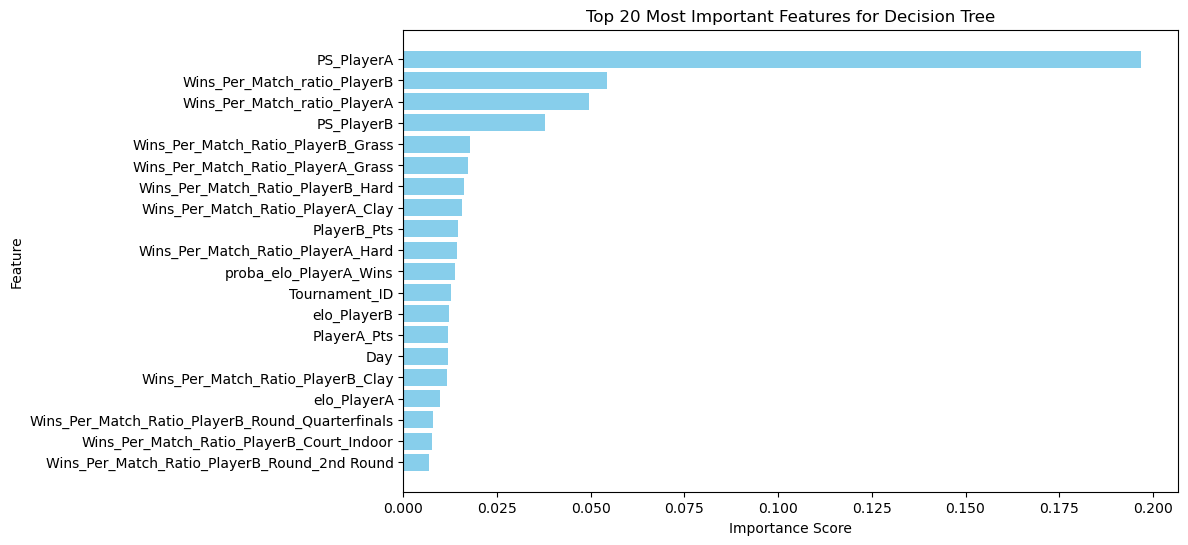

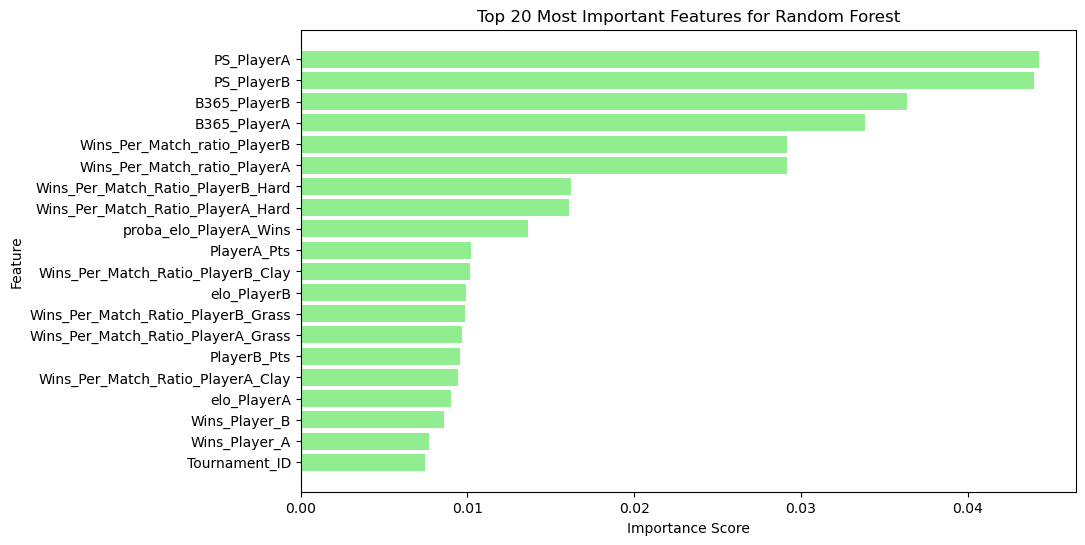

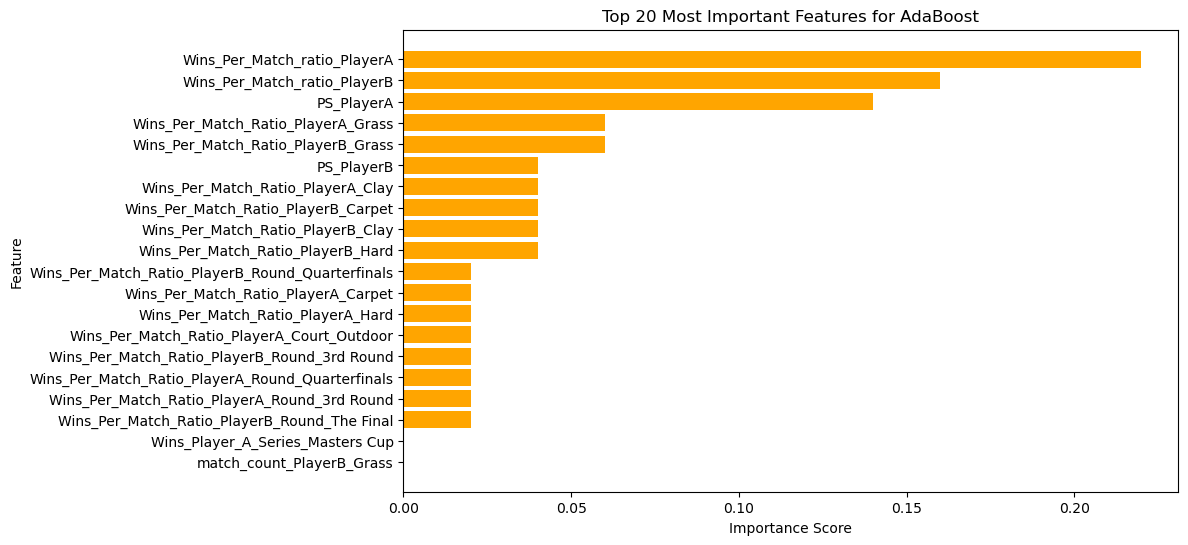

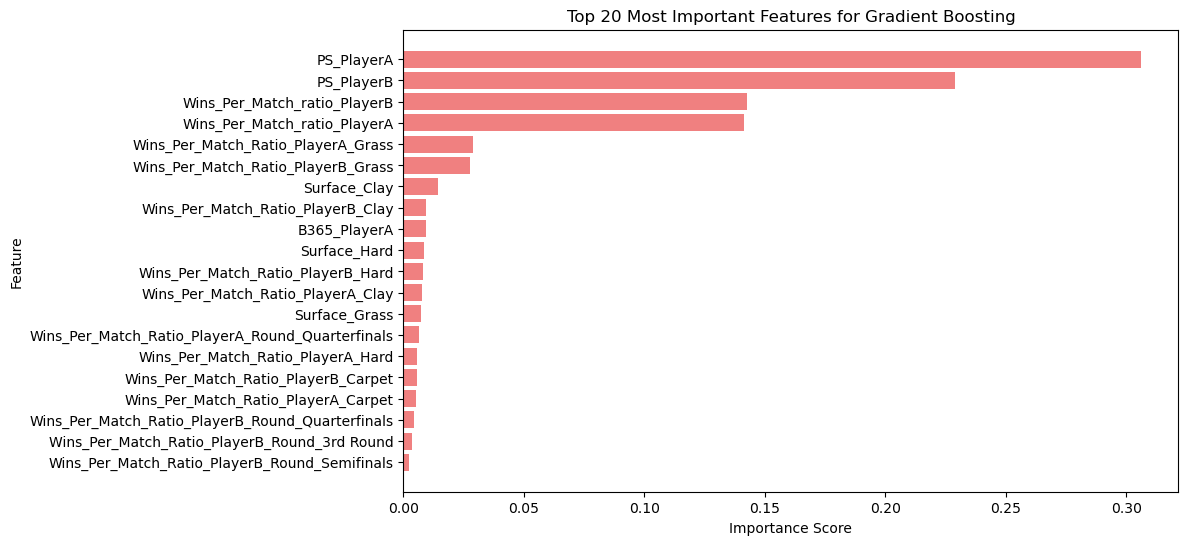

In [114]:
# This cell takes the whole enginnered data frame df12 and calculates the 20 most important features for each model
# furthermore, it will display the 20 most important features for each model

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Define the features and target variable
X = df12.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = df12['PlayerA_Wins']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=573)

# Initialize the models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ab_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

# Fit the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Get feature importances
dt_importances = dt_model.feature_importances_
rf_importances = rf_model.feature_importances_
ab_importances = ab_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Sort indices and get top 20 features for each model
dt_sorted_indices = dt_importances.argsort()[::-1][:20]
rf_sorted_indices = rf_importances.argsort()[::-1][:20]
ab_sorted_indices = ab_importances.argsort()[::-1][:20]
gb_sorted_indices = gb_importances.argsort()[::-1][:20]

# Get feature names
feature_names = X.columns

# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(range(20), dt_importances[dt_sorted_indices], color='skyblue')
plt.yticks(range(20), [feature_names[i] for i in dt_sorted_indices])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features for Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(20), rf_importances[rf_sorted_indices], color='lightgreen')
plt.yticks(range(20), [feature_names[i] for i in rf_sorted_indices])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features for Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Plot feature importances for AdaBoost
plt.figure(figsize=(10, 6))
plt.barh(range(20), ab_importances[ab_sorted_indices], color='orange')
plt.yticks(range(20), [feature_names[i] for i in ab_sorted_indices])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features for AdaBoost')
plt.gca().invert_yaxis()
plt.show()

# Plot feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(range(20), gb_importances[gb_sorted_indices], color='lightcoral')
plt.yticks(range(20), [feature_names[i] for i in gb_sorted_indices])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features for Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()


In [120]:
# Get the names of the top 20 features
top_20_rf_features = [feature_names[i] for i in rf_sorted_indices]

# Print the top 20 features
print("Top 20 features for Random Forest:")
for i, feature in enumerate(top_20_rf_features, 1):
    print(f"{i}. {feature}")



Top 20 features for Random Forest:
1. B365_PlayerB
2. PS_PlayerA
3. PS_PlayerB
4. Wins_Per_Match_ratio_PlayerB
5. Wins_Per_Match_ratio_PlayerA
6. B365_PlayerA
7. proba_elo_PlayerA_Wins
8. Wins_Per_Match_Ratio_PlayerB_Hard
9. Wins_Per_Match_Ratio_PlayerA_Hard
10. PlayerA_Pts
11. elo_PlayerB
12. PlayerB_Pts
13. Wins_Per_Match_Ratio_PlayerB_Clay
14. Wins_Per_Match_Ratio_PlayerB_Grass
15. Wins_Per_Match_Ratio_PlayerA_Grass
16. Wins_Per_Match_Ratio_PlayerA_Clay
17. elo_PlayerA
18. Wins_Player_A
19. Wins_Player_B
20. Tournament_ID


Feature: PS_PlayerA, Frequency: 4
Feature: Wins_Per_Match_ratio_PlayerB, Frequency: 4
Feature: Wins_Per_Match_ratio_PlayerA, Frequency: 4
Feature: PS_PlayerB, Frequency: 4
Feature: Wins_Per_Match_Ratio_PlayerA_Grass, Frequency: 4
Feature: Wins_Per_Match_Ratio_PlayerB_Grass, Frequency: 4
Feature: Wins_Per_Match_Ratio_PlayerA_Clay, Frequency: 4
Feature: Wins_Per_Match_Ratio_PlayerB_Hard, Frequency: 4
Feature: Wins_Per_Match_Ratio_PlayerA_Hard, Frequency: 4
Feature: Wins_Per_Match_Ratio_PlayerB_Clay, Frequency: 4


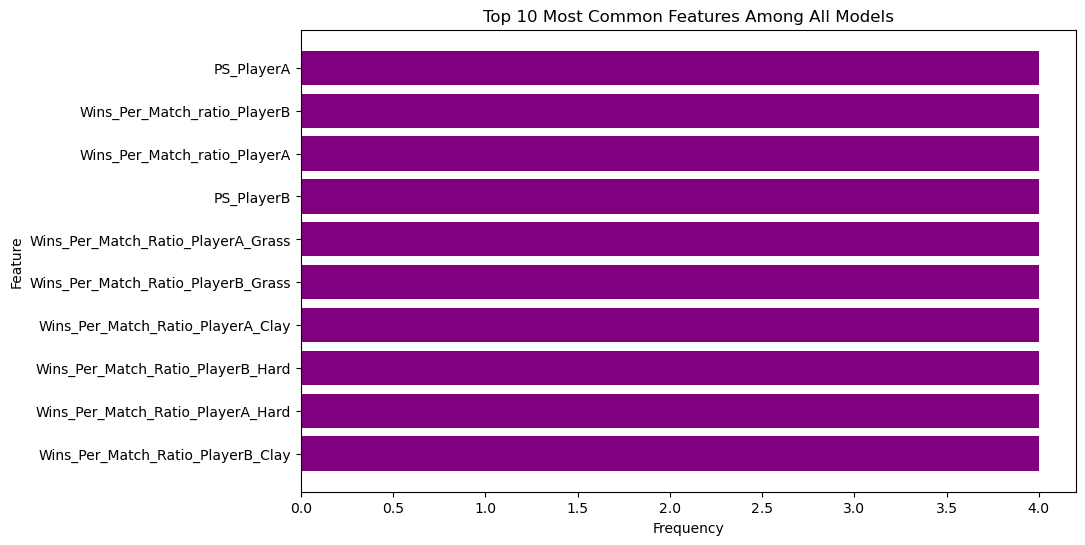

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

# Define the features and target variable
X = df12.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = df12['PlayerA_Wins']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=573)

# Initialize the models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ab_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

# Fit the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Get feature importances
dt_importances = dt_model.feature_importances_
rf_importances = rf_model.feature_importances_
ab_importances = ab_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Sort indices and get top 20 features for each model
dt_sorted_indices = dt_importances.argsort()[::-1][:20]
rf_sorted_indices = rf_importances.argsort()[::-1][:20]
ab_sorted_indices = ab_importances.argsort()[::-1][:20]
gb_sorted_indices = gb_importances.argsort()[::-1][:20]

# Get feature names
feature_names = X.columns

# Create a list of top 20 features for each model
dt_top_features = [feature_names[i] for i in dt_sorted_indices]
rf_top_features = [feature_names[i] for i in rf_sorted_indices]
ab_top_features = [feature_names[i] for i in ab_sorted_indices]
gb_top_features = [feature_names[i] for i in gb_sorted_indices]

# Combine all the lists
all_top_features = dt_top_features + rf_top_features + ab_top_features + gb_top_features

# Count the frequency of each feature
feature_frequency = Counter(all_top_features)

# Get the 10 most common features
most_common_features = feature_frequency.most_common(10)

# Print the 10 most common features
for feature, frequency in most_common_features:
    print(f'Feature: {feature}, Frequency: {frequency}')

# Plot the 10 most common features
features, frequencies = zip(*most_common_features)  # unzip the list of tuples
plt.figure(figsize=(10, 6))
plt.barh(range(10), frequencies, color='purple')
plt.yticks(range(10), features)
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Top 10 Most Common Features Among All Models')
plt.gca().invert_yaxis()
plt.show()


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Define the features and target variable

X = top25_rf.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = top25_rf['PlayerA_Wins']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=573)

# Initialize the models
dt_model2 = DecisionTreeClassifier()
rf_model2 = RandomForestClassifier()
ab_model2 = AdaBoostClassifier()
gb_model2 = GradientBoostingClassifier()

# Fit the models
dt_model2.fit(X_train, y_train)
rf_model2.fit(X_train, y_train)
ab_model2.fit(X_train, y_train)
gb_model2.fit(X_train, y_train)

ypred_dt2=dt_model2.predict(X_test)
ypred_rf2=rf_model2.predict(X_test)
ypred_ab2=ab_model2.predict(X_test)
ypred_gb2=gb_model2.predict(X_test)

In [140]:
# Confussion matrix top 20 features for random forest model
pd.crosstab(y_test, ypred_rf2)

col_0,False,True
PlayerA_Wins,,
False,3615,1191
True,1328,3631


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the features and target variable
X = top25_rf.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = top25_rf['PlayerA_Wins']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=573)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score found
print("Best accuracy:", grid_search.best_score_)


# Modeling with top 20 features to predict target variable PlayerA_Wins

In [116]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df12.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = df12['PlayerA_Wins']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=573)

# Initialize the models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ab_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

# Fit the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Get feature importances
dt_importances = dt_model.feature_importances_
rf_importances = rf_model.feature_importances_
ab_importances = ab_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Sort indices and get top 20 features for each model
dt_sorted_indices = dt_importances.argsort()[::-1][:20]
rf_sorted_indices = rf_importances.argsort()[::-1][:20]
ab_sorted_indices = ab_importances.argsort()[::-1][:20]
gb_sorted_indices = gb_importances.argsort()[::-1][:20]

# Define a function to calculate accuracy for top features
def calculate_accuracy_for_top_features(model, indices):
    # Select top features
    X_train_top_features = X_train.iloc[:, indices]
    X_test_top_features = X_test.iloc[:, indices]

    # Fit the model with top features
    model.fit(X_train_top_features, y_train)

    # Make predictions
    y_pred = model.predict(X_test_top_features)

    # Calculate and return accuracy score
    return accuracy_score(y_test, y_pred)

# Calculate accuracy for top 20 features for each model
dt_accuracy = calculate_accuracy_for_top_features(dt_model, dt_sorted_indices)
rf_accuracy = calculate_accuracy_for_top_features(rf_model, rf_sorted_indices)
ab_accuracy = calculate_accuracy_for_top_features(ab_model, ab_sorted_indices)
gb_accuracy = calculate_accuracy_for_top_features(gb_model, gb_sorted_indices)

# Print the accuracy scores
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"AdaBoost Accuracy: {ab_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")


Decision Tree Accuracy: 0.6516129032258065
Random Forest Accuracy: 0.7422427035330261
AdaBoost Accuracy: 0.7420378904249872
Gradient Boosting Accuracy: 0.7571940604198669


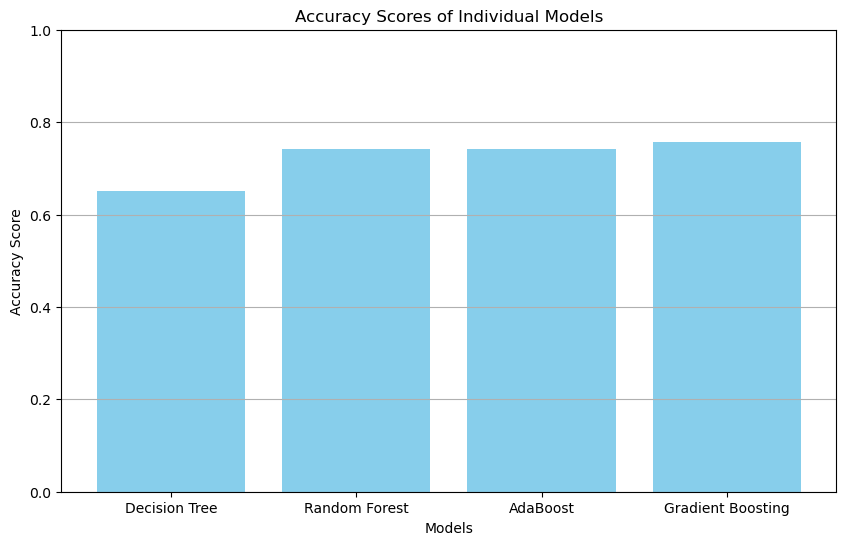

In [117]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [dt_accuracy, rf_accuracy, ab_accuracy, gb_accuracy]
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.title('Accuracy Scores of Individual Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.grid(axis='y')

# Show plot
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

# Make predictions using each model
y_pred_dt = clf_dt_sorted.predict(X_test_sorted_new)
y_pred_rf = clf_rf_sorted.predict(X_test_sorted_new)
y_pred_ab = clf_ab_sorted.predict(X_test_sorted_new)
y_pred_gb = clf_gb_sorted.predict(X_test_sorted_new)

# Create confusion matrices
confusion_dt = confusion_matrix(y_test_sorted_new, y_pred_dt)
confusion_rf = confusion_matrix(y_test_sorted_new, y_pred_rf)
confusion_ab = confusion_matrix(y_test_sorted_new, y_pred_ab)
confusion_gb = confusion_matrix(y_test_sorted_new, y_pred_gb)

# Create crosstab DataFrames
crosstab_dt = pd.crosstab(y_test_sorted_new, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
crosstab_rf = pd.crosstab(y_test_sorted_new, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
crosstab_ab = pd.crosstab(y_test_sorted_new, y_pred_ab, rownames=['Actual'], colnames=['Predicted'])
crosstab_gb = pd.crosstab(y_test_sorted_new, y_pred_gb, rownames=['Actual'], colnames=['Predicted'])

# Print the confusion matrices
print("Confusion Matrix for Decision Tree:")
print(confusion_dt)
print("\nConfusion Matrix for Random Forest:")
print(confusion_rf)
print("\nConfusion Matrix for AdaBoost:")
print(confusion_ab)
print("\nConfusion Matrix for Gradient Boosting:")
print(confusion_gb)

# Print the crosstab DataFrames
print("\nCrosstab for Decision Tree:")
print(crosstab_dt)
print("\nCrosstab for Random Forest:")
print(crosstab_rf)
print("\nCrosstab for AdaBoost:")
print(crosstab_ab)
print("\nCrosstab for Gradient Boosting:")
print(crosstab_gb)


Confusion Matrix for Decision Tree:
[[3155 1651]
 [1695 3264]]

Confusion Matrix for Random Forest:
[[3572 1234]
 [1352 3607]]

Confusion Matrix for AdaBoost:
[[3607 1199]
 [1320 3639]]

Confusion Matrix for Gradient Boosting:
[[3692 1114]
 [1243 3716]]

Crosstab for Decision Tree:
Predicted  False  True 
Actual                 
False       3155   1651
True        1695   3264

Crosstab for Random Forest:
Predicted  False  True 
Actual                 
False       3572   1234
True        1352   3607

Crosstab for AdaBoost:
Predicted  False  True 
Actual                 
False       3607   1199
True        1320   3639

Crosstab for Gradient Boosting:
Predicted  False  True 
Actual                 
False       3692   1114
True        1243   3716


# Model with simple neural network (whole data frame df12)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# X and y split
X = df12.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = df12['PlayerA_Wins']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')





Epoch 1/40


1221/1221 [==============================] - 2s 1ms/step - loss: 0.5309 - accuracy: 0.7215 - val_loss: 0.5008 - val_accuracy: 0.7448
Epoch 2/40
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4971 - accuracy: 0.7451 - val_loss: 0.4912 - val_accuracy: 0.7483
Epoch 3/40
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4825 - accuracy: 0.7563 - val_loss: 0.4883 - val_accuracy: 0.7500
Epoch 4/40
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4719 - accuracy: 0.7619 - val_loss: 0.4744 - val_accuracy: 0.7598
Epoch 5/40
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4628 - accuracy: 0.7695 - val_loss: 0.4811 - val_accuracy: 0.7609
Epoch 6/40
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4555 - accuracy: 0.7725 - val_loss: 0.4697 - val_accuracy: 0.7665
Epoch 7/40
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4479 - accuracy: 0.7772 - val_loss: 0.4628 - val_accu

In [38]:
import pandas as pd

# Convert the predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Create a DataFrame with actual and predicted labels
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary.flatten()})

# Create a crosstab
crosstab = pd.crosstab(results['Actual'], results['Predicted'], rownames=['Actual'], colnames=['Predicted'])

print(crosstab)




Predicted     0     1
Actual               
False      3734  1119
True       1141  3771


# Simple neural network with top 20 features from random forrest model

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = top25_rf.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = top25_rf['PlayerA_Wins']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Epoch 1/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.5204 - accuracy: 0.7291 - val_loss: 0.4971 - val_accuracy: 0.7480
Epoch 2/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.5011 - accuracy: 0.7453 - val_loss: 0.4952 - val_accuracy: 0.7474
Epoch 3/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4944 - accuracy: 0.7489 - val_loss: 0.4860 - val_accuracy: 0.7500
Epoch 4/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4893 - accuracy: 0.7514 - val_loss: 0.4841 - val_accuracy: 0.7507
Epoch 5/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4857 - accuracy: 0.7517 - val_loss: 0.4803 - val_accuracy: 0.7589
Epoch 6/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4835 - accuracy: 0.7547 - val_loss: 0.4789 - val_accuracy: 0.7552
Epoch 7/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.4806 - accuracy: 0.7544 - val_loss: 0.4802 - val_ac

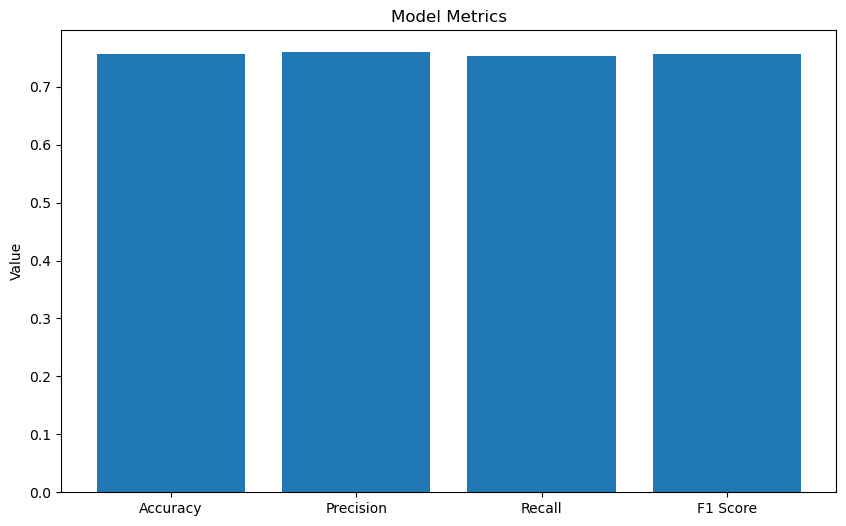

In [88]:
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Prepare data for the bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.title('Model Metrics')
plt.ylabel('Value')
plt.show()


# Betting simulation 

In [14]:
# run this cell to see how the beeting strategy performs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Define the features and target variable

X = top25_rf.drop(['PlayerA_Wins', 'proba_elo_PlayerB_Wins'], axis=1)
y = top25_rf['PlayerA_Wins']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=573)

# Initialize the models
dt_model2 = DecisionTreeClassifier()
rf_model2 = RandomForestClassifier()
ab_model2 = AdaBoostClassifier()
gb_model2 = GradientBoostingClassifier()

# Fit the models
dt_model2.fit(X_train, y_train)
rf_model2.fit(X_train, y_train)
ab_model2.fit(X_train, y_train)
gb_model2.fit(X_train, y_train)

ypred_dt2=dt_model2.predict(X_test)
ypred_rf2=rf_model2.predict(X_test)
ypred_ab2=ab_model2.predict(X_test)
ypred_gb2=gb_model2.predict(X_test)

In [20]:
# Bets 1 unit on the prediction made by the model, with the Pinnacle Odds
total_money_rf = 0
total_bet_rf = 0
bet_amount = 1  # Setting the bet amount to 1 unit for each bet

# Loop through your test set
for i in range(len(X_test)):
    # Get the prediction for the game
    prediction = ypred_rf2[i]   
    # Get the actual result using iloc
    actual_result = y_test.iloc[i]
    
    # Get the odds for Player A and Player B
    odds_A = X_test.iloc[i]['PS_PlayerA']
    odds_B = X_test.iloc[i]['PS_PlayerB']
 
    # Increase the total bet
    total_bet_rf += bet_amount
    
    # If you predicted Player A wins
    if prediction == 1:
        # If Player A actually wins
        if actual_result == 1:
            # You win the bet, add the money you win to the total
            total_money_rf += odds_A * bet_amount
        else:
            # You lose the bet, subtract the money you bet from the total
            total_money_rf -= bet_amount
    # If you predicted Player B wins
    else:
        # If Player B actually wins
        if actual_result == 0:
            # You win the bet, add the money you win to the total
            total_money_rf += odds_B * bet_amount
        else:
            # You lose the bet, subtract the money you bet from the total
            total_money_rf -= bet_amount

print("Total money after betting with Random Forest Classifier:", total_money_rf)
print("Total money bet with Random Forest Classifier:", total_bet_rf)
print("Your total ROI is:", total_money_rf - total_bet_rf)


Total money after betting with Random Forest Classifier: 8675.513000000059
Total money bet with Random Forest Classifier: 9765
Your total ROI is: -1089.486999999941


In [22]:
# this cell well iterate over every model and will bet
# Initialize dictionaries to store total money and total bets for each model
total_money = {}
total_bet = {}
bet_amount = 1  # Setting the bet amount to 1 unit for each bet

# Models' predictions
predictions = {
    "Decision Tree": ypred_dt2,
    "Random Forest": ypred_rf2,
    "AdaBoost": ypred_ab2,
    "Gradient Boosting": ypred_gb2
}

# Loop through each model's predictions
for model_name, model_predictions in predictions.items():
    # Reset total money and total bet for each model
    total_money[model_name] = 0
    total_bet[model_name] = 0
    
    # Loop through your test set
    for i in range(len(X_test)):
        # Get the prediction for the game
        prediction = model_predictions[i]   
        # Get the actual result using iloc
        actual_result = y_test.iloc[i]

        # Get the odds for Player A and Player B
        odds_A = X_test.iloc[i]['PS_PlayerA']
        odds_B = X_test.iloc[i]['PS_PlayerB']

        # Increase the total bet
        total_bet[model_name] += bet_amount

        # If you predicted Player A wins
        if prediction == 1:
            # If Player A actually wins
            if actual_result == 1:
                # You win the bet, add the money you win to the total
                total_money[model_name] += odds_A * bet_amount
            else:
                # You lose the bet, subtract the money you bet from the total
                total_money[model_name] -= bet_amount
        # If you predicted Player B wins
        else:
            # If Player B actually wins
            if actual_result == 0:
                # You win the bet, add the money you win to the total
                total_money[model_name] += odds_B * bet_amount
            else:
                # You lose the bet, subtract the money you bet from the total
                total_money[model_name] -= bet_amount

    print(f"Total money after betting with {model_name}:", total_money[model_name])
    print(f"Total money bet with {model_name}:", total_bet[model_name])
    print(f"Your total ROI with {model_name} is:", total_money[model_name] - total_bet[model_name])



Total money after betting with Decision Tree: 7594.661000000038
Total money bet with Decision Tree: 9765
Your total ROI with Decision Tree is: -2170.3389999999617
Total money after betting with Random Forest: 8675.513000000059
Total money bet with Random Forest: 9765
Your total ROI with Random Forest is: -1089.486999999941
Total money after betting with AdaBoost: 8450.304000000058
Total money bet with AdaBoost: 9765
Your total ROI with AdaBoost is: -1314.6959999999417
Total money after betting with Gradient Boosting: 8696.675000000054
Total money bet with Gradient Boosting: 9765
Your total ROI with Gradient Boosting is: -1068.3249999999462


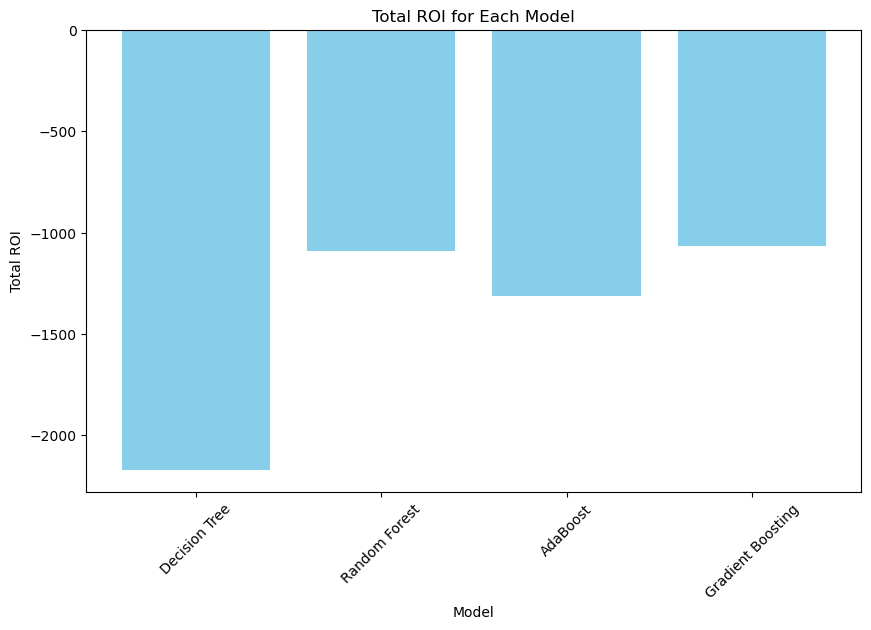

In [23]:
import matplotlib.pyplot as plt

# Get the ROI for each model
rois = {model_name: total_money[model_name] - total_bet[model_name] for model_name in total_money}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(rois.keys(), rois.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Total ROI')
plt.title('Total ROI for Each Model')
plt.xticks(rotation=45)
plt.show()
